In [ ]:
path = '/content/taleoftwocities.txt'
with open(path, encoding='utf8', errors='ignore') as f:
  text = f.read().lower()

**Data Preprocessing and Visualization**


In [ ]:
from keras.preprocessing.text import Tokenizer
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import re
from keras.utils import to_categorical
from nltk.tokenize import RegexpTokenizer
cleaned = RegexpTokenizer(r'\w+')
tokens = cleaned.tokenize(text)
train_len = 3+1
text_sequences = []
for i in range(train_len,len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)
sequences = {}
count = 1
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences) 
 
vocabulary_size = len(tokenizer.word_counts)+1

n_sequences = np.empty([len(sequences),train_len], dtype='int32')
for i in range(len(sequences)):
    n_sequences[i] = sequences[i]

Using TensorFlow backend.


In [ ]:
train_inputs = n_sequences[:,:-1]
train_targets = n_sequences[:,-1]
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)
seq_len = train_inputs.shape[1]
train_inputs.shape

(138134, 3)

In [ ]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
WNL = nltk.WordNetLemmatizer()
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in tokens ]
stopwords_wc = set(STOPWORDS)

<BarContainer object of 10 artists>

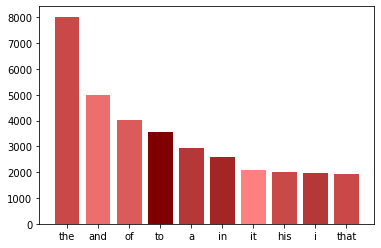

In [ ]:
#graph for top 10 most occuring stopwords
import matplotlib as mp
data = [8, 6, 7, 12, 9, 10, 5, 8, 9]
 
# Colorize the graph based on likeability:
likeability_scores = np.array(data)
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
  ) 
from collections import defaultdict
dic=defaultdict(int)
for word in text_content:
    if word in stopwords_wc:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color=color_map(data_normalizer(likeability_scores)))

In [ ]:
text_content = [word for word in text_content if word not in stopwords_wc]
text_content = [s for s in text_content if len(s) != 0]
text_content = [WNL.lemmatize(t) for t in text_content]

[('best', 'time'), ('time', 'worst'), ('worst', 'time'), ('time', 'age'), ('age', 'wisdom'), ('wisdom', 'age'), ('age', 'foolishness'), ('foolishness', 'epoch'), ('epoch', 'belief'), ('belief', 'epoch'), ('epoch', 'incredulity'), ('incredulity', 'season'), ('season', 'light'), ('light', 'season'), ('season', 'darkness'), ('darkness', 'spring'), ('spring', 'hope'), ('hope', 'winter'), ('winter', 'despair'), ('despair', 'everything'), ('everything', 'u'), ('u', 'nothing'), ('nothing', 'u'), ('u', 'going'), ('going', 'direct'), ('direct', 'heaven'), ('heaven', 'going'), ('going', 'direct'), ('direct', 'way'), ('way', 'short'), ('short', 'period'), ('period', 'far'), ('far', 'present'), ('present', 'period'), ('period', 'noisiest'), ('noisiest', 'authority'), ('authority', 'insisted'), ('insisted', 'received'), ('received', 'good'), ('good', 'evil'), ('evil', 'superlative'), ('superlative', 'degree'), ('degree', 'comparison'), ('comparison', 'king'), ('king', 'large'), ('large', 'jaw'), ('

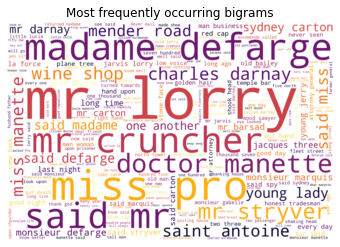

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


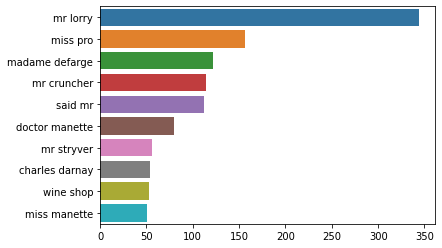

In [ ]:
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc, background_color="white", colormap=mp.cm.inferno)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

#graph for top 10 most occuring bigrams
import seaborn as sns

top_n_bigrams=words_freq[:10][:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('said mr lorry', 73), ('said miss pro', 44), ('said mr cruncher', 24), ('said madame defarge', 20), ('mr attorney general', 13), ('mr jarvis lorry', 12), ('one thousand seven', 11), ('thousand seven hundred', 11), ('said mr stryver', 11), ('mr lorry said', 9), ('evremonde called darnay', 9), ('one hundred five', 8), ('hundred five north', 8), ('five north tower', 8), ('monsieur heretofore marquis', 8), ('keeper wine shop', 7), ('said mender road', 7), ('liberty equality fraternity', 7), ('equality fraternity death', 7), ('prison la force', 7), ('charles evremonde called', 7), ('year one thousand', 6), ('asked mr lorry', 6), ('cried mr lorry', 6), ('said charles darnay', 6), ('croaked jacques three', 6), ('seven hundred seventy', 5), ('hundred seventy five', 5), ('wine shop keeper', 5), ('said monsieur defarge', 5), ('head upon pillow', 5), ('look upon prisoner', 5), ('answered mr lorry', 5), ('returned miss pro', 5), ('mr lorry looked', 5), ('doctor manette said', 5), ('said doctor m

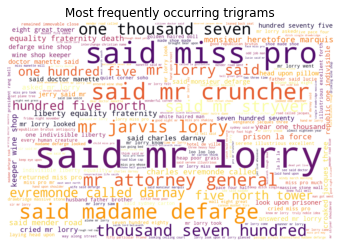

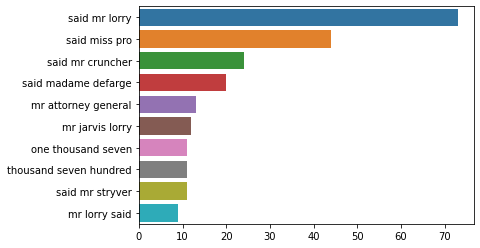

In [ ]:
trigrams_list = list(nltk.trigrams(text_content))
print(trigrams_list)
dictionary3 = [' '.join(tup) for tup in trigrams_list]
print (dictionary3)

vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary3)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])


words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc, background_color="white", colormap=mp.cm.inferno)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring trigrams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_trigram.jpg')

#graph for top 10 most occuring trigrams

top_n_trigrams=words_freq[:10][:10]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

Training the LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Embedding
import tensorflow as tf

model = Sequential()
model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(vocabulary_size, activation='softmax'))
print(model.summary())

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)


model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
history = model.fit(train_inputs,train_targets,validation_split=0.1,epochs=20,batch_size=128,shuffle=True,callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 3)              29202     
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 128)            67584     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124320 samples, validate on 13814 samples
Epoch 1/20
124320/124320 [==============================] - 77s 619us/step - loss: 6.7149 - accuracy: 0.0585 - val_loss: 6.4801 - val_accuracy: 0.0522
Epoch 2/20
124320/124320 [==============================] - 75s 604us/step - loss: 6.3770 - accuracy: 0.0599 - val_loss: 6.3539 - val_accuracy: 0.0623
Epoch 3/20
124320/124320 [==============================] - 74s 594us/step - loss: 6.1845 - accuracy: 0.0744 - val_loss: 6.2835 - val_accuracy: 0.0647
Epoch 4/20
124320/124320 [==============================] - 76s 608us/step - loss: 6.0335 - accuracy: 0.0830 - val_loss: 6.2334 - val_accuracy: 0.0750
Epoch 5/20
124320/124320 [==============================] - 74s 598us/step - loss: 5.9032 - accuracy: 0.0923 - val_loss: 6.1812 - val_accuracy: 0.0821
Epoch 6/20
124320/124320 [==============================] - 74s 592us/step - loss: 5.7780 - accuracy: 0.1037 - val_loss: 6.1459 - val_accuracy: 0.0902
Epoch 7/20
124320/124320 [=================

Predictions

In [ ]:
from keras.preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
print(encoded_text, pad_encoded)
for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:",pred_word)

there was a 
[33, 12, 5] [[33 12  5]]
Next word suggestion: man
Next word suggestion: little
Next word suggestion: good


Evaluation

In [ ]:
model.evaluate(train_inputs,train_targets,verbose=0)

[4.88586010292164, 0.14536608755588531]

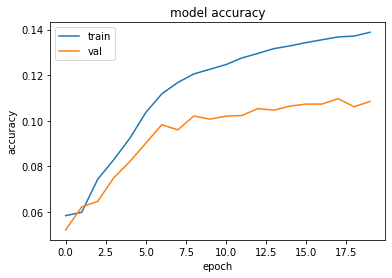

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


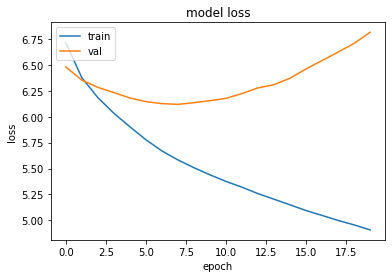

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')